# Contents List
- Importing Libraries and Data Frames
    - orders_products_flags
- Visualizations
    - Bar chart - days of week
    - Histograms and Scatterplots - prices
    - Line Chart - dow and prices
    - Sampling Data
    - hour of day histogram
    - customer loyalty distribution
    - hour and prices line
    - age and dependants line
    - age and income scatter
- Export visualizations

# 01. Import Libraries and Dataframes

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\kesmc\Documents\2023 Instacart Basket Analysis CF'

In [3]:
ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_flags.pkl'))

In [8]:
ords_prods_merge.shape

(32404859, 24)

In [10]:
ords_prods_merge.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,1,2398795,1,2,3,7,15.0,196,1,1,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2,473747,1,3,3,12,21.0,196,1,1,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,3,2254736,1,4,4,7,29.0,196,1,1,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,4,431534,1,5,4,15,28.0,196,1,1,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 02. Bar Charts

<AxesSubplot:>

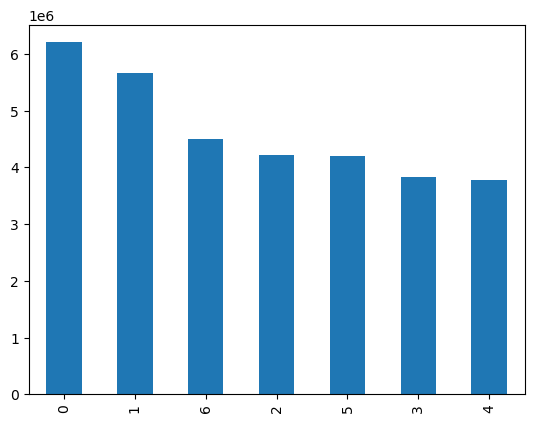

In [11]:
#similar to frequency check
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

Auto sorts biggest to largest - to change use function below

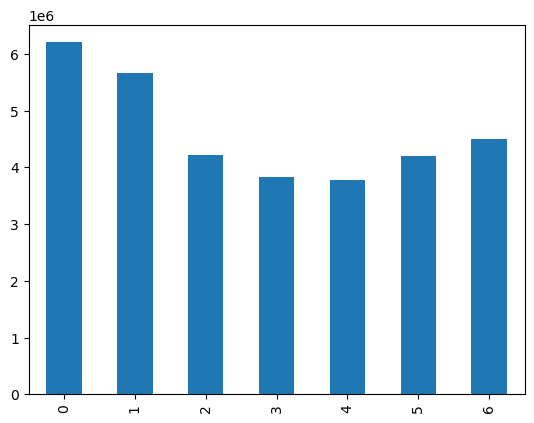

In [12]:
bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

Can be used for printing prequencies as well

In [13]:
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [14]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

To add color to bar chart include indexed list of colors as an argument in your function

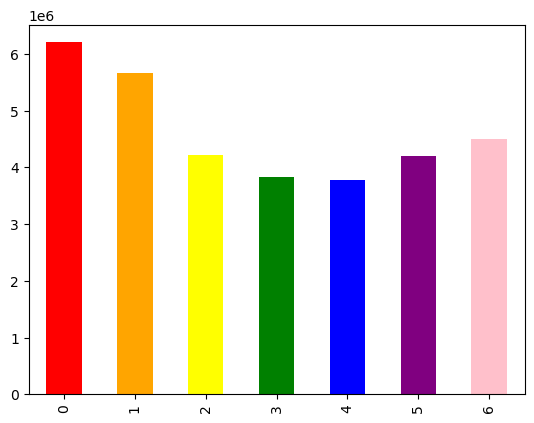

In [15]:
bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['red', 'orange' , 'yellow', 'green', 'blue', 'purple', 'pink'])

# Exporting Charts

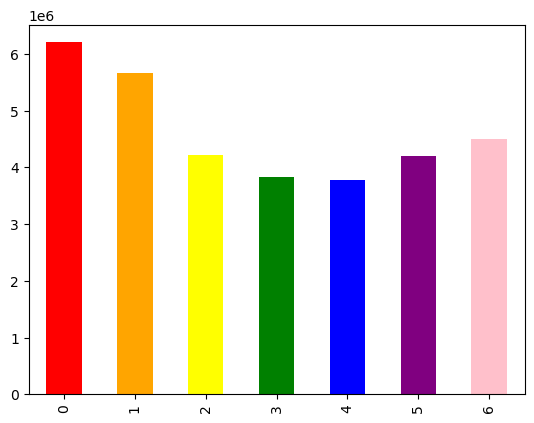

In [16]:
# to access chart
bar.figure

In [17]:
#export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms and Scatterplot

<AxesSubplot:ylabel='Frequency'>

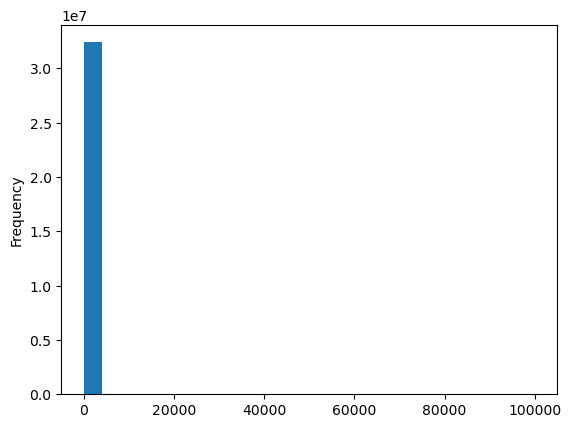

In [18]:
# histogram of prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

Should have 25 columns one for each bin - something is off

<AxesSubplot:xlabel='prices', ylabel='prices'>

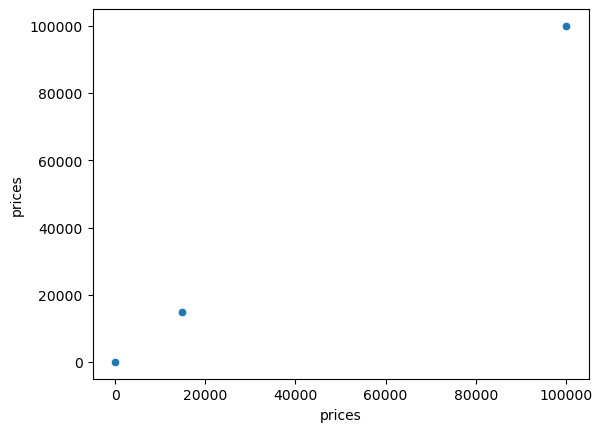

In [19]:
#scatterplot of same data
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

## check what's off

In [20]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [21]:
ords_prods_merge['prices'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0            9.0
1            9.0
2            9.0
3            9.0
4            9.0
            ... 
32404854     3.7
32404855     3.7
32404856     6.9
32404857     6.9
32404858    10.3
Name: prices, Length: 32404859, dtype: float64>

In [22]:
ords_prods_merge['prices'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0            9.0
1            9.0
2            9.0
3            9.0
4            9.0
            ... 
32404854     3.7
32404855     3.7
32404856     6.9
32404857     6.9
32404858    10.3
Name: prices, Length: 32404859, dtype: float64>

In [23]:
ords_prods_merge['prices'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            9.0
1            9.0
2            9.0
3            9.0
4            9.0
            ... 
32404854     3.7
32404855     3.7
32404856     6.9
32404857     6.9
32404858    10.3
Name: prices, Length: 32404859, dtype: float64>

In [24]:
# check outliers above $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag
10030345,171,912404,17,12,2,14,5.0,21553,5,0,...,14900.0,High-range product,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,frequent customer
10030346,181,603376,17,22,6,16,4.0,21553,3,1,...,14900.0,High-range product,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,frequent customer
10030347,1944,3264360,135,2,2,21,13.0,21553,6,0,...,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,1945,892534,135,3,0,8,12.0,21553,3,1,...,14900.0,High-range product,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,5708,229704,342,8,1,19,30.0,21553,9,0,...,14900.0,High-range product,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,29,0,8,4.0,33664,1,0,...,99999.0,High-range product,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,frequent customer
29166210,3386544,2363282,204099,31,0,9,2.0,33664,1,1,...,99999.0,High-range product,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,frequent customer
29166211,3391313,3181945,204395,13,3,15,8.0,33664,25,0,...,99999.0,High-range product,Least busy,Average orders,15,Regular customer,451.153540,High spender,5.0,frequent customer
29166212,3405096,2486215,205227,7,3,20,4.0,33664,8,0,...,99999.0,High-range product,Least busy,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [25]:
# Turn these into missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [26]:
ords_prods_merge['prices'].max()

25.0

NOTE: should have been done suring data cleaning

<AxesSubplot:ylabel='Frequency'>

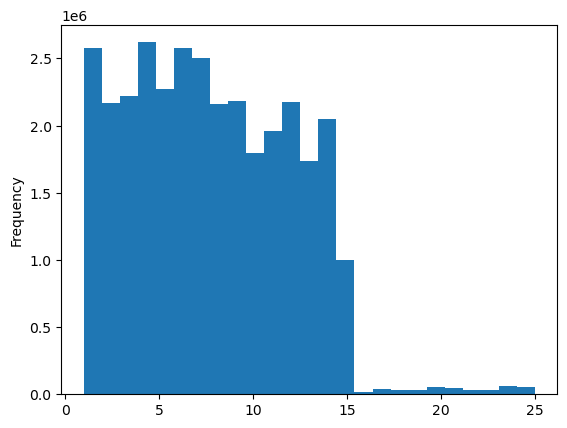

In [27]:
# Recheck histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

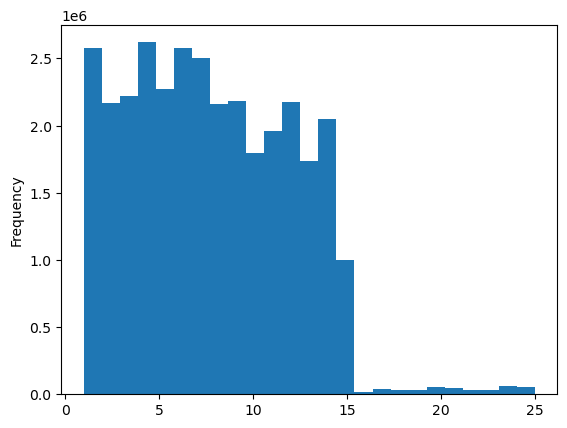

In [28]:
hist=ords_prods_merge['prices'].plot.hist(bins = 25)

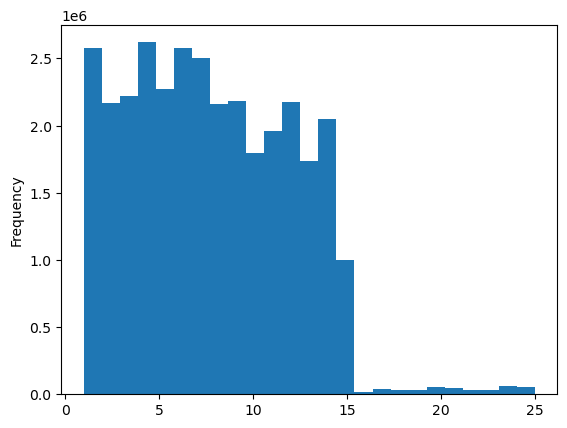

In [29]:
hist.figure

In [30]:
# export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Line Charts

While we dont have dates we can look at prices accross the days per week. Subset for practice as the many values in prices column will take a lot of computing power? No! Use...

# Sampling Data

In [31]:
#70/30 split (list of random floating numbers between 0 and 1 (where 1 + 100% of the data))
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

seed represents a random but producible pattern - 4 makes it reproducible rather than a new random number each time funtion is run
dev stores boolean values (True or False whether it's less than or equal to .7
np.random rand() is the argument that creates the random list of floating numbers (rand- ensures random numbers follow the uniform distribution)
len() produces a value of whatever you place inside of it

code needs:
1) seed set
2) number of random numbers needed
3) code a logical test (<=0.7)
4) store results in new list (dev) in form of boolean values

In [32]:
# simple example just to see how it works
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [33]:
#split dataframe in two samples
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

everything true (aka <= 0.7 or part of dev) is in big, ~ negates anything not part of dev (therefore false) is small

In [34]:
# check that the sum of big and small rows is equal to that of df
len(ords_prods_merge)

32404859

In [35]:
len(big) + len(small)

32404859

In [36]:
#reduce samples to only those necessary to the chart - run and check result
df_2 = small[['orders_day_of_week','prices']]

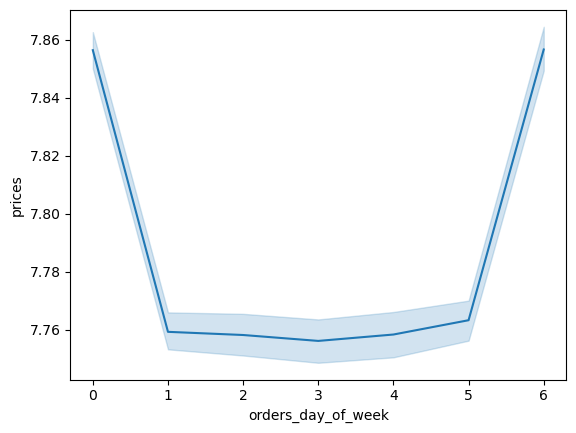

In [37]:
#line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

blue bands are error bands (confidence intervals)

# 03. Tasks

### task 3

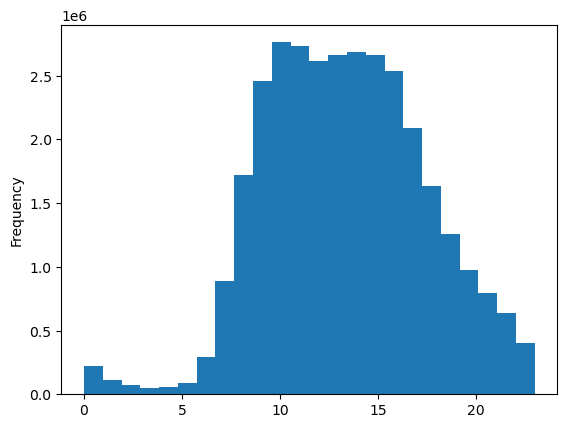

In [51]:
#Create a histogram of the order hour of day column
HOD_hist=ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

Histogram demonstrates that the hours 10-12 are the busiest hours with 12-3 still very busy, and fairly evenly so. It aslo shows the quicker incline from 7-10 and more gradual decline in orders 3-10pm, with the lowest orders 1am-6am. 

### task 4

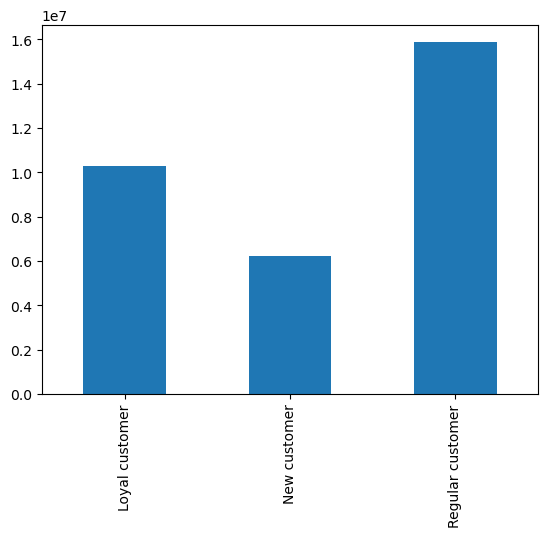

In [39]:
#bar chart for distribution of orders among loyalty flag column customers
loyalty_bar=ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

### task 5

In [40]:
#Check whether there’s a difference in “prices” column depending on the hour of the day
#(To check this, you need to use an accurate sample for your line chart from above


In [45]:
#reduce samples to only those necessary to the chart
df_3 = small[['order_hour_of_day','prices']]

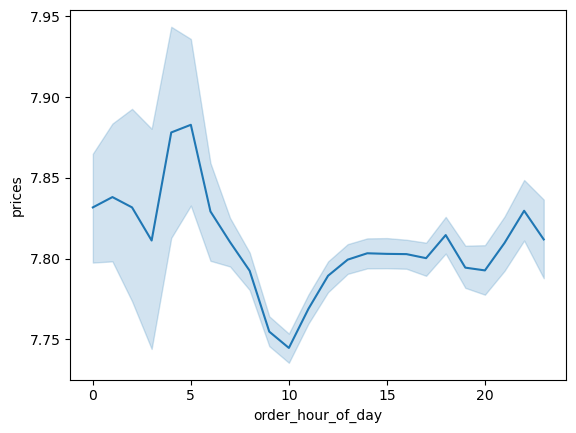

In [46]:
HOD_prices_line=sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

### task 6 - exploratory analysis with updated df

In [4]:
#import merged dataframe
ords_prods_customer=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

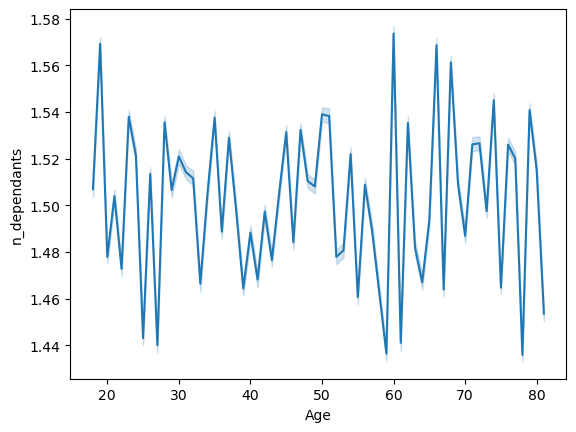

In [7]:
#determine whether there’s a connection between age and family situation by creating a 
#line chart exploring the connections between age and number of dependents
age_depend_line=sns.lineplot(data=ords_prods_customer, x = 'Age',y = 'n_dependants')

line chart indicates that there is no connection between age and number of dependents.

### task 7

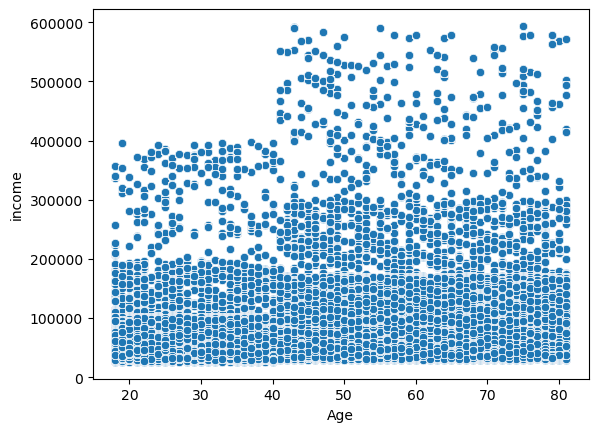

In [9]:
#create a scatterplot to explore whether there’s a connection between age and income
age_income_scatter=sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_customer)

Scatterplot shows that there is a substantial jump at the age of 40 for customers to more likely to have a larger income, in the mid range salaries and especially above 400000 as there are no customers under 40 with a salary above 400000.

# Export visualizations

In [52]:
HOD_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HOD_hist.png'))

In [49]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

In [50]:
HOD_prices_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HOD_prices_line.png'))

In [12]:
age_depend_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depend_line.png'))

In [13]:
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatter.png'))